___
# Ciência dos Dados - PROJETO 2

___
## Nome 1 João Pedro Montefeltro Junqueira Meirelles

## Nome 2 Ester dos Santos Quintino

___

___

## 1. Problema

O Classificador Naive-Bayes, o qual se baseia no uso do teorema de Bayes, é largamente utilizado em filtros anti-spam de e-mails. O classificador permite calcular qual a probabilidade de uma mensagem ser SPAM considerando as palavras em seu conteúdo e, de forma complementar, permite calcular a probabilidade de uma mensagem ser HAM dada as palavras descritas na mensagem.

Para realizar o MVP (minimum viable product) do projeto, você precisa programar uma versão do classificador que "aprende" o que é uma mensagem SPAM considerando uma base de treinamento e comparar o desempenho dos resultados com uma base de testes. 


___
## 2. Separação da base de dados em Treinamento e Teste

A base de dados deve ser separada em duas partes, aleatoriamente, considerando: 
    
    75% dos dados para a parte Treinamento; e
    25% dos dados para a parte Teste.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as jeca
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\furyo\Desktop\CDDP-P2


# Lendo a base de dados

In [3]:
dados = pd.read_excel('spamham.xlsx')
dados = dados.iloc[np.random.permutation(len(dados))]

In [4]:
num = len(dados.Email)
setenta_cinco = int(num*0.75)

___
## 3. Classificador Naive-Bayes

# Limpeza das mensagens e remoção dos caracteres que não afetam a classificação

In [5]:
arranca = [':','!','?',',','"','/',';','.','-','_','=','+','(',')','*','@','#','$','%','§','&']
for i in range(num):
    dados.Email[i:i+1] = dados.Email[i:i+1].str.replace('  ',' ') # Mudança de 2 espaços para 1
    for j in arranca:
        dados.Email[i:i+1] = dados.Email[i:i+1].str.replace(j,'') 

dados.Email

5421               Hi elaine is today's meeting confirmed
3295    Hi there We have now moved in2 our pub  Would ...
934     Dear Matthew please call 09063440451 from a la...
1165           Haha yeah I see that now be there in a sec
1405                                  Kkany special today
4677    It is a good thing I'm now getting the connect...
2181                      PS U no ur a grown up now right
2613    Sir hope your day is going smoothly i really h...
4525    I want some cock My hubby's away I need a real...
1956    Take something for pain If it moves however to...
1562    Dude just saw a parked car with its sunroof po...
648                     No prob I will send to your email
1191    Come to my home for one last time i wont do an...
60      Your gonna have to pick up a 1 burger for your...
10      I'm gonna be home soon and i don't want to tal...
2997                                       No b4 Thursday
1180                             I'm in chennai velachery
3551          

# Separação da base de dados em Treinamento e Teste na fração 3 para 1.

In [6]:
#75% dos dados para a parte Treinamento.
#25% dos dados para a parte Teste.

dados_treino = dados.iloc[:setenta_cinco]
dados_teste = dados.iloc[setenta_cinco:num]
dados_reais = dados.iloc[setenta_cinco:num]


# Probabilidade de  uma mensagem ser SPAM e Probabilidade de uma mensagem ser HAM

In [7]:
dados_teste = dados_teste.Email.values #Values retorna uma lista com os emails.

Spam = dados_treino.Email[dados_treino.Class == 'spam'].values
Ham = dados_treino.Email[dados_treino.Class == 'ham'].values

# Probabilidade de uma mensagem ser SPAM:

Pspam = (dados_treino.Email[dados_treino.Class == 'spam'].count()/dados_treino.Email.count())*100

# Probabilidade de uma mensagem ser HAM:

Pham = (dados_treino.Email[dados_treino.Class == 'ham'].count()/dados_treino.Email.count())*100

# Criação de uma lista que armazena as palavras do email

In [8]:
#SPAM
spam_words = []
ham_words = []
i = 0
while i < len(Spam):
    word = Spam[i].split()
    for j in word:
        if j.isdigit == True:
            pass
        if len(j) <= 3:
            pass
        else:
            spam_words.append(j)
    i+=1

In [9]:
#HAM
i = 0
while i < len(Ham):
    word = Ham[i].split()
    for j in word:
        if j.isdigit == True:
            pass
        if len(j) <= 3:
            pass
        else:
            ham_words.append(j)
    i+=1

# Criação de um dicionário 

In [10]:
spam_dic = {}
for i in spam_words:
    n = 1
    if i in spam_dic:
        pass
    else:   
        for j in spam_words:
            if i == j:
                n += 1
            else:
                pass
        spam_dic[i] = (n + 1)/(len(spam_words)*2 + len(ham_words))
ham_dic = {}
for i in ham_words:
    n = 1
    if i in ham_dic:
        pass
    else:   
        for j in ham_words:
            if i == j:
                n += 1
            else:
                pass
        ham_dic[i] = (n + 1)/(len(ham_words)*2 + len(spam_words))

# CLassificação

In [11]:
def classificando(emails,spam,ham,Pspam,Pham,roc):
    classificados = {} #Devolve se o email é SPAM ou se o email é HAM
    for emailss in emails:
        pspam = Pspam
        pham = Pham
        email = str(emailss).split()
        
        for w in email: #probabilidade de uma palavra acontecer se a mensagem na base treinamento é considerada SPAM e HAM.
            if w in spam:
                pspam = pspam*spam[w]
            if w in ham:
                pham = pham*ham[w]
        if pspam > roc*(pspam + pham):
            classificados[emailss] = 'spam'
        else:
            classificados[emailss] = 'ham'
    return classificados

In [12]:
# Reestruturação dos dados teste
teste = []
for i in dados_teste:
    teste.append(i)
dados_teste = teste

In [13]:
#Guardando classificados e probabilidades em variáveis
roc = 0.5
tudo_certo = classificando(dados_teste,spam_dic,ham_dic,Pspam,Pham,roc)
tudo_certo

{'Were trying to find a Chinese food place around here': 'spam',
 'SMSSERVICES for yourinclusive text credits pls goto wwwcomuknet login 3qxj9 unsubscribe with STOP no extra charge help 08702840625COMUK 220CM2 9AE': 'ham',
 'Can you plz tell me the ans BSLVYL sent via fullonsmscom': 'spam',
 'Shall i come to get pickle': 'spam',
 'Horrible gal Me in sch doing some stuff How come u got mc': 'spam',
 "Hey babe sorry i didn't get sooner Gary can come and fix it cause he thinks he knows what it is but he doesn't go as far a Ptbo and he says it will cost ltgt bucks I don't know if it might be cheaper to find someone there  We don't have any second hand machines at all right now let me know what you want to do babe": 'spam',
 'Yar he quite clever but aft many guesses lor He got ask me 2 bring but i thk darren not so willing 2 go Aiya they thk leona still not attach wat': 'spam',
 'Yup ok': 'ham',
 'Haiyoh Maybe your hamster was jealous of million': 'spam',
 "Your right I'll make the appointm

In [14]:
# Lista com apenas spam's e ham's
results = []
for i in dados_teste:
    results.append(tudo_certo[i])

In [15]:
df_meus = pd.DataFrame({
    'Class' : results,
    'Emails' : dados_teste
})

In [16]:
valores_reais = dados_reais.Class.values

In [17]:
df_comp = pd.DataFrame({
    'Minhas' : results,
    'Reais' : valores_reais
})

In [18]:
# % de acertos
spam_spam = df_comp.Minhas[(df_comp.Minhas == 'spam') & (df_comp.Reais == 'spam')].count()
spam_ham = df_comp.Minhas[(df_comp.Minhas == 'spam') & (df_comp.Reais == 'ham')].count()
ham_ham = df_comp.Minhas[(df_comp.Minhas == 'ham') & (df_comp.Reais == 'ham')].count()
ham_spam = df_comp.Minhas[(df_comp.Minhas == 'ham') & (df_comp.Reais == 'spam')].count()

In [19]:
print(pd.crosstab(df_comp.Reais,df_comp.Minhas))

Minhas  ham  spam
Reais            
ham     187  1005
spam    174    27


# Testando o Classificador

In [20]:
def reclass(dados_teste,spam_dic,ham_dic,Pspam,Pham,roc):
    tudo_certo = classificando(dados_teste,spam_dic,ham_dic,Pspam,Pham,roc)
    results = []
    for i in dados_teste:
        results.append(tudo_certo[i])
    df_meus = pd.DataFrame({
        'Class' : results,
        'Emails' : dados_teste
    })
    valores_reais = dados_reais.Class.values
    df_comp = pd.DataFrame({
        'Minhas' : results,
        'Reais' : valores_reais
    })
    spam_spam = df_comp.Minhas[(df_comp.Minhas == 'spam') & (df_comp.Reais == 'spam')].count()
    spam_ham = df_comp.Minhas[(df_comp.Minhas == 'spam') & (df_comp.Reais == 'ham')].count()
    ham_ham = df_comp.Minhas[(df_comp.Minhas == 'ham') & (df_comp.Reais == 'ham')].count()
    ham_spam = df_comp.Minhas[(df_comp.Minhas == 'ham') & (df_comp.Reais == 'spam')].count()

    return df_comp, spam_spam, spam_ham, ham_ham, ham_spam


In [28]:
r = np.arange(0,1,0.01)
sensibilidade = []
especificidade = []
lista_SV = []
lista_SF = []
lista_HV = []
lista_HF = []

for roca in r:
    df_comp, spam_spam, spam_ham, ham_ham, ham_spam = reclass(dados_teste,spam_dic,ham_dic,Pspam,Pham,roca)
    curva_intel_verdadeiro = spam_spam/(spam_spam + spam_ham)
    curva_intel_falso = ham_ham/(ham_ham + ham_spam)
    sensibilidade.append(curva_intel_verdadeiro)
    especificidade.append(curva_intel_falso)
    lista_SV.append(spam_spam)
    lista_SF.append(spam_ham)
    lista_HV.append(ham_ham)
    lista_HF.append(ham_spam)
    print(pd.crosstab(df_comp.Reais,df_comp.Minhas))
    print('\n')

C:\Users\furyo\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':


Minhas  spam
Reais       
ham     1192
spam     201


Minhas  ham  spam
Reais            
ham      87  1105
spam    163    38


Minhas  ham  spam
Reais            
ham     107  1085
spam    165    36


Minhas  ham  spam
Reais            
ham     115  1077
spam    165    36


Minhas  ham  spam
Reais            
ham     120  1072
spam    165    36


Minhas  ham  spam
Reais            
ham     123  1069
spam    166    35


Minhas  ham  spam
Reais            
ham     129  1063
spam    167    34


Minhas  ham  spam
Reais            
ham     131  1061
spam    167    34


Minhas  ham  spam
Reais            
ham     131  1061
spam    167    34


Minhas  ham  spam
Reais            
ham     134  1058
spam    167    34


Minhas  ham  spam
Reais            
ham     137  1055
spam    167    34


Minhas  ham  spam
Reais            
ham     138  1054
spam    168    33


Minhas  ham  spam
Reais            
ham     139  1053
spam    168    33


Minhas  ham  spam
Reais            
ham     140  1052
spam

In [33]:
sensibilidade = sorted(sensibilidade)
especificidade = sorted(especificidade)

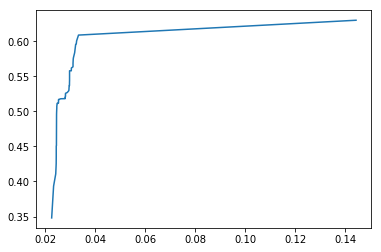

In [36]:
jeca.plot(sensibilidade,especificidade)
jeca.show()

##### Printando o teste com os dados reais
for i in range(len(dados_reais)):
    print(str(dados_reais.Class[i:i+1].values) + ',' + str(df.Class[i:i+1].values))
    if dados_reais.Class[i:i+1].values == df.Class[i:i+1].values:
        print('True')
    elif dados_reais.Class[i:i+1].values != df.Class[i:i+1].values:
        print('False'

## 4. Curva ROC

___
## 5. Qualidade do Classificador alterando a base de treinamento